In [1]:
! pip install -q kaggle

In [2]:
import pandas as pd


In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kahaan0","key":"b45edcdc1c97512d453883500ab117ed"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d rohitsahoo/sales-forecasting

Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 88.6MB/s]


In [9]:
!unzip sales-forecasting.zip

Archive:  sales-forecasting.zip
  inflating: train.csv               


In [10]:
df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [47]:
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import matplotlib.pyplot as plt

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format = "%d/%m/%Y")
df.set_index('Order Date',inplace = True)

In [13]:
df = df.sort_values('Order Date')
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Product Name']
df.drop(cols,axis = 1,inplace = True)

In [14]:
agg = df.groupby(['Order Date', 'Sub-Category']).sum().reset_index()
pivot_sales = agg.pivot(index='Order Date', columns='Sub-Category', values='Sales')
pivot_sales = pivot_sales.fillna(0)
all_categories = df['Sub-Category'].unique()
pivot_sales = pivot_sales.reindex(columns=all_categories, fill_value=0)

In [15]:
pivot_sales

Sub-Category,Paper,Binders,Storage,Labels,Art,Phones,Chairs,Fasteners,Furnishings,Accessories,Envelopes,Bookcases,Appliances,Tables,Supplies,Machines,Copiers
Order Date,,,,,,,,,,,,,,,,,
2015-01-03,16.448,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2015-01-04,0.000,3.540,272.736,11.784,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2015-01-05,0.000,0.000,0.000,0.000,19.536,0.000,0.000,0.000,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2015-01-06,25.980,609.980,0.000,0.000,18.260,1147.940,2573.820,31.120,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2015-01-07,0.000,10.430,0.000,0.000,0.000,0.000,0.000,0.000,76.728,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,60.782,3.132,750.680,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2018-12-27,0.000,0.000,0.000,0.000,13.248,164.388,0.000,0.000,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2018-12-28,4.280,62.032,908.874,72.450,29.648,14.850,454.076,13.960,18.328,0.0,0.0,78.8528,0.0,0.0,0.0,0.0,0.0


In [16]:
cat = input()

Paper


In [17]:
data = pivot_sales[cat]


In [18]:
date_range = pd.date_range(start='2015-01-03', end='2018-12-30', freq='D')
date_range = pd.to_datetime(date_range)
data_reindexed = data.reindex(date_range)
data_filled_forward = data_reindexed.ffill()

In [45]:
data_filled_forward = pd.DataFrame(data_filled_forward)


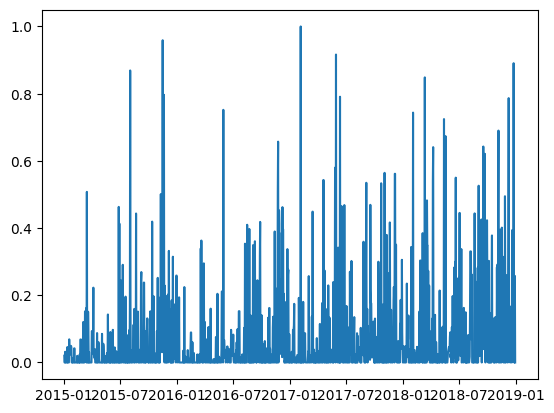

1398

In [51]:
scaler = MinMaxScaler()
sales_reshaped = data_filled_forward[cat].values.reshape(-1, 1)
sales_scaled = scaler.fit_transform(sales_reshaped)
data_filled_forward[cat] = sales_scaled
plt.plot(data_filled_forward.index,data_filled_forward[cat])
plt.show()
train = sales_scaled[:-60]
len(train)

In [52]:
n_input = 15
n_features = 1
generator = TimeseriesGenerator(sales_scaled,sales_scaled,length = n_input,batch_size = 1)

In [54]:
X,y = generator[0]
print(X)

[[[0.02020192]
  [0.        ]
  [0.        ]
  [0.03190941]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.04594561]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]]


In [55]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.optimizers import Adam
from keras.layers import Dropout

In [56]:
model = Sequential()
model.add(LSTM(50,activation = 'relu',input_shape = (n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam",loss = "mse")
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50)                10400     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.fit(generator,epochs = 30,batch_size = 30)

Epoch 1/30
1443/1443 [==============================] - 29s 19ms/step - loss: 0.0177
Epoch 2/30
1443/1443 [==============================] - 29s 20ms/step - loss: 0.0174
Epoch 3/30
1443/1443 [==============================] - 28s 19ms/step - loss: 0.0174
Epoch 4/30
1443/1443 [==============================] - 28s 19ms/step - loss: 0.0174
Epoch 5/30
1443/1443 [==============================] - 28s 19ms/step - loss: 0.0174
Epoch 6/30
1443/1443 [==============================] - 28s 19ms/step - loss: 0.0172
Epoch 7/30
1443/1443 [==============================] - 28s 19ms/step - loss: 0.0172
Epoch 8/30
1443/1443 [==============================] - 29s 20ms/step - loss: 0.0171
Epoch 9/30
1443/1443 [==============================] - 28s 19ms/step - loss: 0.0171
Epoch 10/30
1443/1443 [==============================] - 28s 19ms/step - loss: 0.0170
Epoch 11/30
1443/1443 [==============================] - 28s 19ms/step - loss: 0.0171
Epoch 12/30
1443/1443 [==============================] - 27s 19